In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as wd
from scipy.stats import linregress

# Explorar datos de estaciones limnigráficas

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/edsaac/streamlit_ideam/HEAD?labpath=binder_con_ipywidgets.ipynb)

![Mapa del Río Magdalena](map.png)

In [2]:
datos = pd.read_csv("datos_ideam/tresestaciones.csv")

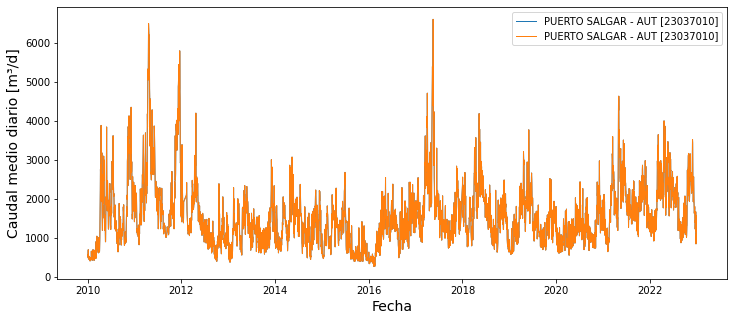

In [3]:
opciones = datos["NombreEstacion"].unique()
estacion_x = wd.Dropdown(description="Una estación", options=opciones, value=opciones[0])
estacion_y = wd.Dropdown(description="Otra estación", options=opciones, value=opciones[1])

## Mostrar series

interactive(children=(Dropdown(description='Una estación', options=('ARRANCAPLUMAS  - AUT [21237020]', 'PUERTO…

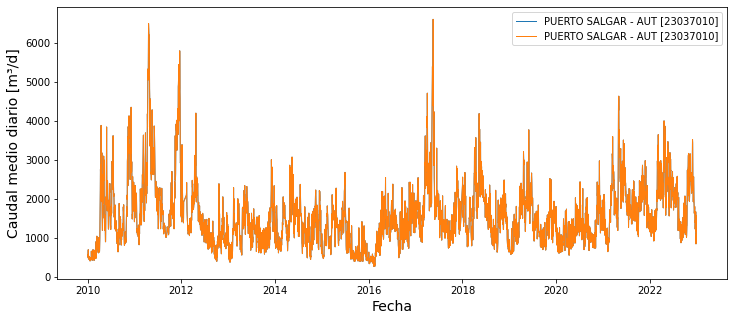

In [4]:
@wd.interact(x=estacion_x, y=estacion_y)
def plot_series(x, y):
    df_x = datos[datos["NombreEstacion"] == x]
    df_x = df_x[["Fecha", "Valor"]]
    df_x["Fecha"] = pd.to_datetime(df_x["Fecha"], format=r"%Y-%m-%d %H:%M")

    df_y = datos[datos["NombreEstacion"] == y]
    df_y = df_y[["Fecha", "Valor"]]
    df_y["Fecha"] = pd.to_datetime(df_y["Fecha"], format=r"%Y-%m-%d %H:%M")

    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(df_x["Fecha"], df_x["Valor"], label=x, lw=1)
    ax.plot(df_y["Fecha"], df_y["Valor"], label=y, lw=1)
    ax.set_xlabel("Fecha", fontsize=14)
    ax.set_ylabel("Caudal medio diario [m³/d]", fontsize=14)
    ax.legend()
    plt.plot()

    combinado = df_x.merge(df_y, on="Fecha", suffixes=[f"_{x}", f"_{y}"])

    regresión = linregress(combinado[f"Valor_{x}"], combinado[f"Valor_{y}"])
    label_regresión = f"""Regresión Lineal: 
    $y = {regresión.slope:.3f} * x + {regresión.intercept:.1f}$
    R² = {regresión.rvalue**2:.3f}"""

    fig, ax = plt.subplots(figsize=(7,7))
    ax.set_aspect("equal")
    ax.scatter(combinado[f"Valor_{x}"], combinado[f"Valor_{y}"], marker=".", s=10)
    ax.axline((0,regresión.intercept), slope=regresión.slope, label=label_regresión, ls="dashed", c="k")
    ax.set_xlabel(f"CMD {x} [m³/s]", fontsize=14)
    ax.set_ylabel(f"CMD {y} [m³/s]", fontsize=14)
    ax.set_ylim(0, 7000)
    ax.set_xlim(0, 7000)
    ax.spines.top.set_visible(False)
    ax.spines.right.set_visible(False)
    ax.legend(fontsize=12)
    plt.show()